<a href="https://colab.research.google.com/github/nva1dman/cross_correlation/blob/main/aver_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Усредняем данные.

In [ ]:
import pandas as pd

# Используем загруженный файл
file_path = '/content/sample_data/data.txt'

# Изменяем способ чтения файла: указываем явно разделители и формат даты
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['JD', 'Date', 'Mag', 'Error'])

# Преобразование колонки с датами из строкового формата в формат даты
data['Date'] = pd.to_datetime(data['Date'].str.split('.').str[0], format='%Y-%m-%d', errors='coerce')

# Выбор нужных колонок
selected_data = data[['JD', 'Date', 'Mag', 'Error']]

# Группировка по дате и вычисление средних значений для оставшихся колонок
grouped_data = selected_data.groupby('Date').mean()

# Округление результатов до двух десятичных знаков
grouped_data = grouped_data.round(3)

# Сброс индекса для получения чистого DataFrame
result = grouped_data.reset_index()

# Сохранение результата в новый текстовый файл
output_file_path = '/content/sample_data/av_data.txt'  # Новый путь к файлу
result.to_csv(output_file_path, sep='\t', index=False, header=False)

output_file_path  # Возвращаем путь к сохраненному файлу для скачивания пользователем

'/content/sample_data/av_data.txt'

Определяем тренд и вычитаем его из данных.

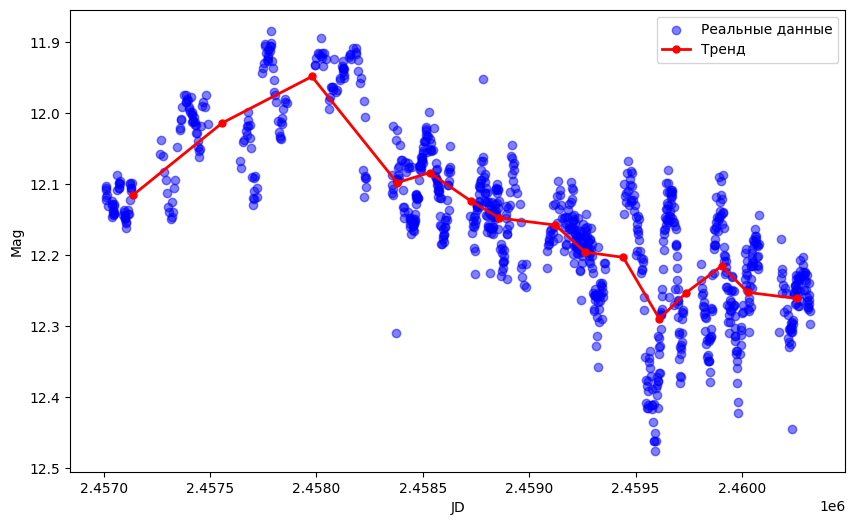

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Загрузка данных
data = pd.read_csv('/content/sample_data/av_data.txt', header=None, delim_whitespace=True, names=['Date', 'JD', 'Mag', 'Error'])

# Исключение первых двух точек из набора данных
data = data.iloc[2:]

# Деление на 15 участков и поиск опорных точек
num_segments = 15
segment_size = len(data) // num_segments
JD_means = []
Mag_means = []

for i in range(num_segments):
    start_idx = i * segment_size
    end_idx = (i + 1) * segment_size if i < num_segments - 1 else len(data)
    JD_mean = data['JD'][start_idx:end_idx].mean()
    Mag_mean = data['Mag'][start_idx:end_idx].mean()
    JD_means.append(JD_mean)
    Mag_means.append(Mag_mean)

# Создание функции для интерполяции тренда
trend_func = interp1d(JD_means, Mag_means, kind='linear', fill_value="extrapolate")

# Вычисление тренда для каждой точки в исходных данных
trend_values = trend_func(data['JD'])

# Вычисление дельты V как разность между исходным значением и трендом
data['Delta_V'] = data['Mag'] - trend_values

# Сохранение результатов в новый файл
result_data = data[['JD', 'Delta_V']]
result_data.to_csv('/content/sample_data/O_C_data.txt', index=False, sep='\t')

output_file_path ='/content/sample_data/O_C_data.txt'
output_file_path

# Визуализация: реальные данные и соединение опорных точек
plt.figure(figsize=(10, 6))
plt.scatter(data['JD'], data['Mag'], color='blue', label='Реальные данные', alpha=0.5)
plt.plot(JD_means, Mag_means, color='red', marker='o', linestyle='-', linewidth=2, markersize=5, label='Тренд')

#plt.title('Тренд путем соединения опорных точек')
plt.xlabel('JD')
plt.ylabel('Mag')
plt.legend()
plt.gca().invert_yaxis()  # Инвертируем ось Y для Mag
plt.show()

Визуализируем данные.

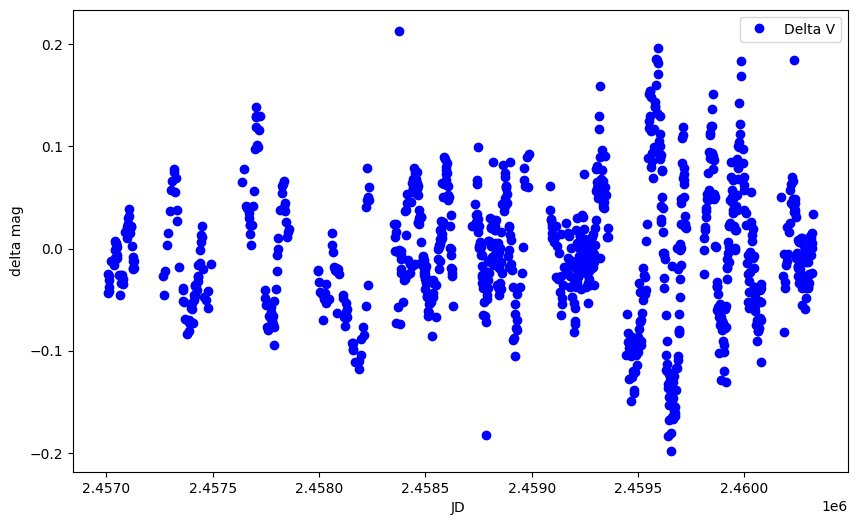

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

delta_V_data = pd.read_csv('/content/sample_data/O_C_data.txt', header=None, delim_whitespace=True, names=['JD', 'Delta_V'])

# Построим график
plt.figure(figsize=(10, 6))
plt.plot(delta_V_data['JD'], delta_V_data['Delta_V'], 'bo', label='Delta V')

plt.xlabel('JD ')
plt.ylabel('delta mag')
plt.legend()
#plt.grid(True)
plt.show()

In [6]:
pip install py-pdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for py-pdm: filename=Py_PDM-0.6.0-cp310-cp310-linux_x86_64.whl size=720114 sha256=a61d4228b4a56872a467dbf15ddeea71497d75fcb390f00a0694e23b4f9e1616
  Stored in directory: /root/.cache/pip/wheels/24/00/45/2faf11f959819c76056145df03a487b9bbb8b59df31d6a5c35
Successfully built py-pdm


Period is 125.497


Text(0, 0.5, 'Theta')

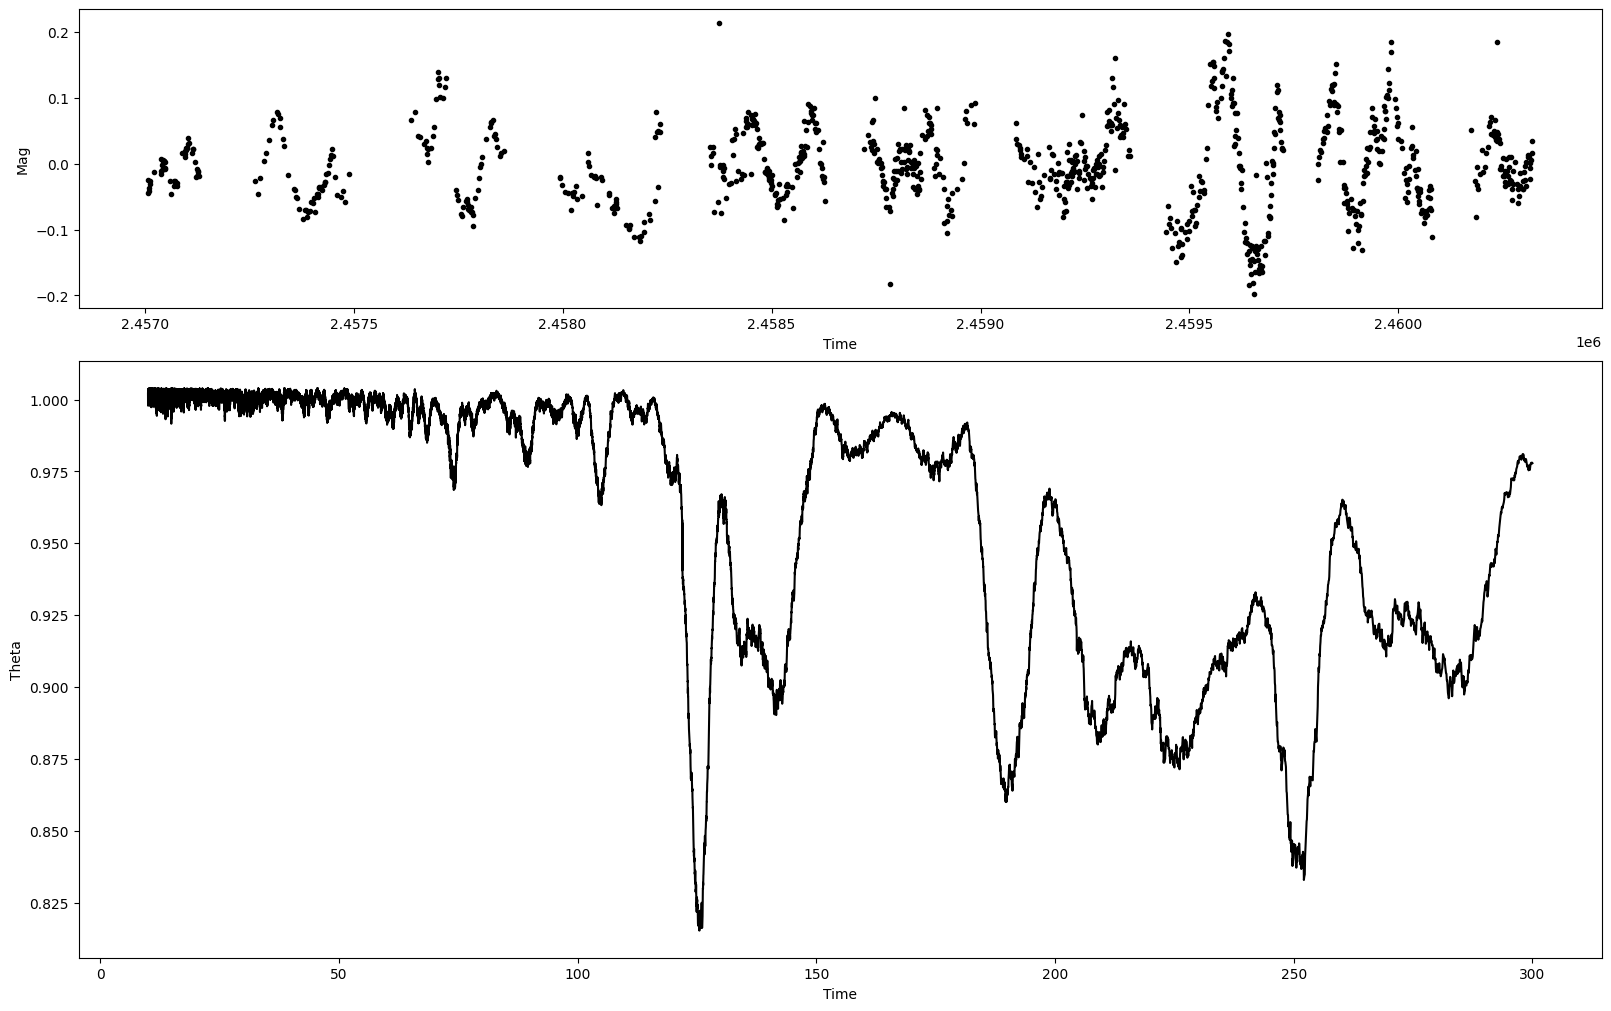

In [7]:
file_path = '/content/sample_data/O_C_data.txt'
data = np.loadtxt(file_path)

# Extract wavelength and intensity columns
time = data[:, 0]
val = data[:, 1]

from pdmpy import pdm
freq, theta = pdm(time, val, f_min=1/300, f_max=1/10, delf=1e-6)
print(f'Period is {1 / freq[np.argmin(theta)]:.3f}')

period = 1/freq[np.argmin(theta)]

fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, figsize=(16, 10), gridspec_kw={'height_ratios': [1, 2]})
ax1.plot(time, val, 'k.')
ax1.set_xlabel('Time')
ax1.set_ylabel('Mag')

ax2.plot(1/freq, theta, 'k')
ax2.set_xlabel('Time')
ax2.set_ylabel('Theta')